In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import  inspect

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:

# reflect an existing database into a new model
inspector = inspect(engine)
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables


In [15]:
# View all of the classes that automap found
inspector.get_table_names()

['measurement', 'station']

In [16]:
# Save references to each table
# assing the tables to classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

2016-08-23


C:\Users\camon\AppData\Local\Temp\ipykernel_8712\2395606902.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  precip_df = query_df.dropna(0)


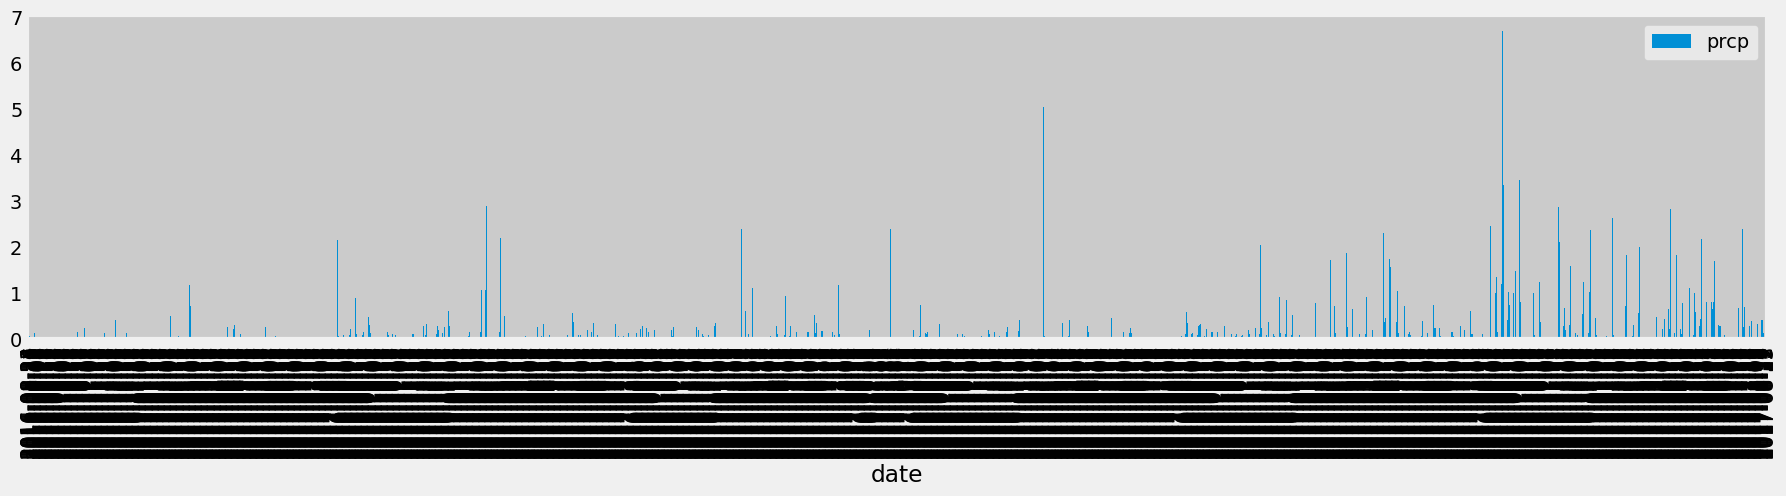

<Figure size 640x480 with 0 Axes>

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017, 8 ,23)
# Calculate the date one year from the last date in data set.
one_year_past = latest_date - dt.timedelta(days=365)
print(str(one_year_past))
# Perform a query to retrieve the data and precipitation scores
p_results =  session.query(Measurement.date, Measurement.prcp ).\
    filter(Measurement.date >= one_year_past).\
    filter(Measurement.date <= latest_date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
#p_results
query_df = pd.DataFrame(p_results)
#query_df.head(10)
# Sort the dataframe by date
query_df.sort_values(["date"], ascending=False)
precip_df = query_df.dropna(0) 
#set the index to date so the graph looks pretty.
precip_df = precip_df.set_index("date") 

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(kind="bar", figsize=(20,4))
plt.show()
plt.tight_layout()


In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
count = len(precip_df)
mean = round(precip_df['prcp'].mean(),6)
stdev = round(precip_df['prcp'].std(),6)
min = round(precip_df['prcp'].min(),6)
max = round(precip_df['prcp'].max(),6)

#get the quartiles
quartiles = precip_df['prcp'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
midq = quartiles[.5]
upperq = quartiles[0.75]

print("	precipitation")
print(f'count {count}')
print(f'mean {mean}')
print(f'std {stdev}')
print(f'25% {lowerq}')
print(f'50% {midq}')
print(f'75% {upperq}')
print(f'max {max}')
print(f'min {min}')

	precipitation
count 2021
mean 0.177279
std 0.46119
25% 0.0
50% 0.02
75% 0.13
max 6.7
min 0.0


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

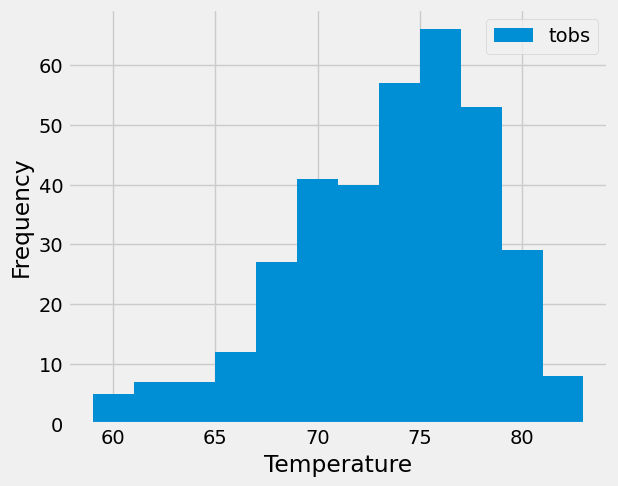

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()